In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housingdata=pd.read_csv("Housing.csv")
housingdata

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
housingdata.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [5]:
housingdata.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
housingdata['mainroad']=num.fit_transform(housingdata['mainroad'])
housingdata['guestroom']=num.fit_transform(housingdata['guestroom'])
housingdata['basement']=num.fit_transform(housingdata['basement'])
housingdata['hotwaterheating']=num.fit_transform(housingdata['hotwaterheating'])
housingdata['airconditioning']=num.fit_transform(housingdata['airconditioning'])
housingdata['prefarea']=num.fit_transform(housingdata['prefarea'])
housingdata

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [9]:
#Apply Mean encoding for agencyID
mean_furnishingstatus=housingdata.groupby('furnishingstatus')['price'].mean()
housingdata['furnishingstatus']=housingdata['furnishingstatus'].map(mean_furnishingstatus)
print(housingdata['furnishingstatus'])

0      5.495696e+06
1      5.495696e+06
2      4.907524e+06
3      5.495696e+06
4      5.495696e+06
           ...     
540    4.013831e+06
541    4.907524e+06
542    4.013831e+06
543    5.495696e+06
544    4.013831e+06
Name: furnishingstatus, Length: 545, dtype: float64


In [15]:
housingdata.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.511606,0.322992,0.460666,0.436585,0.311132,0.286746,0.184500,0.086425,0.466092,0.323426,0.290853,0.319299
area,0.511606,1.000000,0.109293,0.132166,0.063436,0.288688,0.153728,0.034291,0.003017,0.210648,0.343992,0.211465,0.170453
bedrooms,0.322992,0.109293,1.000000,0.349523,0.404938,-0.027016,0.072505,0.093184,0.030500,0.145496,0.105479,0.063184,0.120059
bathrooms,0.460666,0.132166,0.349523,1.000000,0.308414,0.022912,0.141416,0.118434,0.040679,0.170623,0.128327,0.025992,0.150199
stories,0.436585,0.063436,0.404938,0.308414,1.000000,0.116218,0.037742,-0.168265,0.020226,0.282332,0.018348,0.025492,0.099853
mainroad,0.311132,0.288688,-0.027016,0.022912,0.116218,1.000000,0.090776,0.039988,-0.016979,0.098834,0.196908,0.194618,0.152963
guestroom,0.286746,0.153728,0.072505,0.141416,0.037742,0.090776,1.000000,0.370722,-0.024647,0.129571,0.030774,0.163665,0.126633
basement,0.184500,0.034291,0.093184,0.118434,-0.168265,0.039988,0.370722,1.000000,0.001405,0.038985,0.026981,0.227119,0.111794
hotwaterheating,0.086425,0.003017,0.030500,0.040679,0.020226,-0.016979,-0.024647,0.001405,1.000000,-0.121196,0.052868,-0.046841,0.030329
airconditioning,0.466092,0.210648,0.145496,0.170623,0.282332,0.098834,0.129571,0.038985,-0.121196,1.000000,0.129876,0.082452,0.131385


<AxesSubplot:>

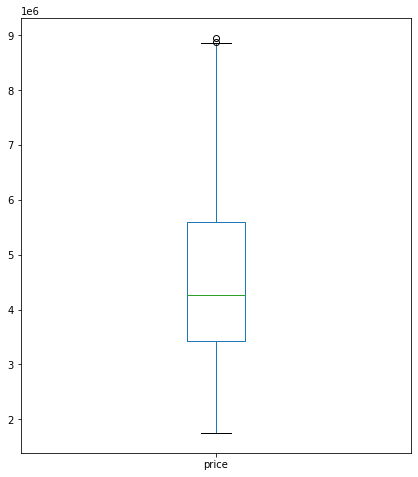

In [16]:
import seaborn as sns
plt.figure(figsize=(7,8))
housingdata.price.plot.box()

In [12]:
housingdata.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [13]:
housingdata.price.max()

13300000

In [14]:
housingdata=housingdata[housingdata['price']<9000000]
housingdata

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,5.495696e+06
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,5.495696e+06
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,4.907524e+06
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,4.907524e+06
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,4.013831e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,4.013831e+06
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,4.907524e+06
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,4.013831e+06
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,5.495696e+06


In [17]:
housingdata

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,5.495696e+06
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,5.495696e+06
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,4.907524e+06
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,4.907524e+06
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,4.013831e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,4.013831e+06
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,4.907524e+06
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,4.013831e+06
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,5.495696e+06


## HOUSING WITH KNN REGRESSION

In [2]:
import pandas as pd
housing_data=pd.read_csv("Housing.csv")
import numpy as np
from sklearn.model_selection import train_test_split
X=housing_data.area
Var=np.array(X).reshape(-1,1)
print(Var.shape)
y1=housing_data.price
X_train,X_test,y_train,y_test=train_test_split(Var,y1,test_size=0.3,random_state=200)

(545, 1)


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Xtrain_scaler=scaler.fit_transform(X_train)
Xtest_scaler=scaler.transform(X_test)


In [4]:
import sklearn.neighbors 
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

In [5]:
list1=[]
e=[]
for k in range(1,20):
    model=neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(Xtrain_scaler,y_train)
    pred=model.predict(Xtest_scaler)
    e.append(mean_squared_error(y_test,pred,squared=False))

In [7]:
e

[2082066.3781981522,
 2059383.1881899468,
 1791255.993128367,
 1691044.097677148,
 1654219.0049853972,
 1604438.2962869196,
 1545221.0784453955,
 1483682.505712164,
 1480044.2035483217,
 1461444.570473914,
 1485307.4991863524,
 1490386.5302538446,
 1507018.190727058,
 1516261.640161219,
 1523031.3934843526,
 1524890.5394128696,
 1529414.675551635,
 1542561.3750913732,
 1546792.5474659489]

,0
0,2.082066e+06
1,2.059383e+06
2,1.791256e+06
3,1.691044e+06
4,1.654219e+06
5,1.604438e+06
6,1.545221e+06
7,1.483683e+06
8,1.480044e+06
9,1.461445e+06


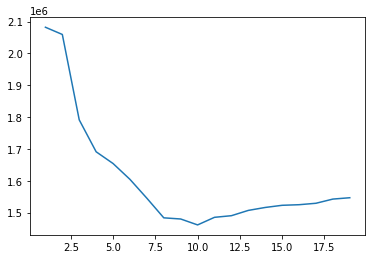

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),e)
z=pd.DataFrame(e)

z

In [9]:
from scipy.spatial import distance
p1=(1,2,3)
p2=(4,5,6)
ed=distance.euclidean(p1,p2)
ed

5.196152422706632

In [10]:
manhatten_dist=distance.cityblock(p1,p2)
manhatten_dist


9

In [11]:
mi=distance.minkowski(p1,p2,p=1)#manhattan distance
mi


9.0

In [12]:
mi=distance.minkowski(p1,p2,p=3)
mi


4.3267487109222245

In [13]:
### hammimg distanace calculation
#larger the difference more the dissimilarity are there.
st1='euclidean'
st2='manhattan'
hd=distance.hamming(list(st1),list(st2))
hd*len(st1)
#cosine distance=1-cosA
#cosine similarity=cosA
#used in recommanded system 
#cosine matrix=we measure angle b/w two vector
#mahalanobis=dist b/w in a mulivariate space.
TMD IS A MAJOR OF THE DISTANCE BETWEEN A POINT P AND A DISTRIBUTION.It is to measure what jow many SD away P is from 

7.0